## **<h3 align="center">Books - Metadata</h3>**
**Group members:**<br>
Alexandra Pinto - 20211599@novaims.unl.pt - 20211599<br>
Ilona Nacu - 20211602@novaims.unl.pt - 20211602<br>
Francisco Farinha - 20211550@novaims.unl.pt - 20211550<br>
João Barradas - 20211590@novaims.unl.pt - 20211590<br>
Rafael Proença  - 2021681@novaims.unl.pt - 2021681<br>

## Introduction
This notebook will serve to the chat to have a database about the books, in particular to have access to CritiScore of a book available in the dataset, for simplicity we will call the database Metadata. To create the metadata, we will perform some preprocessing techniques. 

## Table of Contents
* [1. Import the Libraries](#chapter1)
* [2. Import the Dataset](#chapter2)
* [3. Preprocessing](#chapter3)
    * [3.1. Preproc Book Dataset](#section_3_1)
    * [3.2. Books Data Dataset](#section_3_2)
* [4. Merging the Datasets](#chapter4)
    * [4.1. Cleaning the Merged Dataset](#section_4_1)
    * [4.2. Genres](#section_4_2)
    * [4.3. CritiScore](#section_4_3)
    * [4.4. Saving the Metadata with CritiScores](#section_4_4)


-----------------------------
# 1. Import the Libraries <a class="anchor" id="chapter1"></a>
To run the following notebook, we need to firstly, add the imports.

In [19]:
# General imports
import os
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.cm import get_cmap

# Data analysis and visualization imports
import pandas as pd

----------------------------
# 2. Import the Dataset <a class="anchor" id="chapter2"></a>
Now it is time to open the csv files. Inside the archive we have different datasets divided by genre. Since our goal is to have a more complete dataset we will join this datasets. All the datasets were provided by Kaggle:
- preproc_books - https://www.kaggle.com/datasets/ruchi798/bookcrossing-dataset (Retrieved at 20 november)
- books_data and books_rating - https://www.kaggle.com/datasets/mohamedbakhet/amazon-books-reviews?select=books_data.csv (Retrieved at 20 november)


In [20]:
preproc_books = pd.read_csv(r'Data/Book_files/Preprocessed_data.csv')
books_data = pd.read_csv(r'Data/Book_files/archive/books_data.csv')
books_rating = pd.read_csv(r'Data/Book_files/archive/Books_rating.csv')

Let's have a first view to check some important needs to the preprocessing.

In [21]:
preproc_books.head(3)

,Unnamed: 0,user_id,location,age,isbn,rating,book_title,book_author,year_of_publication,publisher,img_s,img_m,img_l,Summary,Language,Category,city,state,country
0,0,2,"stockton, california, usa",18.0000,0195153448,0,Classical Mythology,Mark P. O. Morford,2002.0,Oxford University Press,http://images.amazon.com/images/P/0195153448.0...,http://images.amazon.com/images/P/0195153448.0...,http://images.amazon.com/images/P/0195153448.0...,Provides an introduction to classical myths pl...,en,['Social Science'],stockton,california,usa
1,1,8,"timmins, ontario, canada",34.7439,0002005018,5,Clara Callan,Richard Bruce Wright,2001.0,HarperFlamingo Canada,http://images.amazon.com/images/P/0002005018.0...,http://images.amazon.com/images/P/0002005018.0...,http://images.amazon.com/images/P/0002005018.0...,"In a small town in Canada, Clara Callan reluct...",en,['Actresses'],timmins,ontario,canada
2,2,11400,"ottawa, ontario, canada",49.0000,0002005018,0,Clara Callan,Richard Bruce Wright,2001.0,HarperFlamingo Canada,http://images.amazon.com/images/P/0002005018.0...,http://images.amazon.com/images/P/0002005018.0...,http://images.amazon.com/images/P/0002005018.0...,"In a small town in Canada, Clara Callan reluct...",en,['Actresses'],ottawa,ontario,canada


In [22]:
books_data.head(3)

,Title,description,authors,image,previewLink,publisher,publishedDate,infoLink,categories,ratingsCount
0,Its Only Art If Its Well Hung!,NaN,['Julie Strain'],http://books.google.com/books/content?id=DykPA...,http://books.google.nl/books?id=DykPAAAACAAJ&d...,NaN,1996,http://books.google.nl/books?id=DykPAAAACAAJ&d...,['Comics & Graphic Novels'],NaN
1,Dr. Seuss: American Icon,Philip Nel takes a fascinating look into the k...,['Philip Nel'],http://books.google.com/books/content?id=IjvHQ...,http://books.google.nl/books?id=IjvHQsCn_pgC&p...,A&C Black,2005-01-01,http://books.google.nl/books?id=IjvHQsCn_pgC&d...,['Biography & Autobiography'],NaN
2,Wonderful Worship in Smaller Churches,This resource includes twelve principles in un...,['David R. Ray'],http://books.google.com/books/content?id=2tsDA...,http://books.google.nl/books?id=2tsDAAAACAAJ&d...,NaN,2000,http://books.google.nl/books?id=2tsDAAAACAAJ&d...,['Religion'],NaN


There are somethings we migth solve by checking the  dataset as:
- treat the NaN values;
- duplicate rows;
- delete link and other irrelevant variables;
- change the variables names.

-------------------------------------
# 3. Preprocessing <a class="anchor" id="chapter3"></a>
Let's start with the preprocess of each dataset. This is done individualy to be easier then to merge all the information about each book.

## 3.1. Preproc Books Dataset <a class="anchor" id="section_3_1"></a>
 Using the info() method we are able to check missing values and also the datatypes. 

In [23]:
preproc_books.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1031175 entries, 0 to 1031174
Data columns (total 19 columns):
 #   Column               Non-Null Count    Dtype  
---  ------               --------------    -----  
 0   Unnamed: 0           1031175 non-null  int64  
 1   user_id              1031175 non-null  int64  
 2   location             1031175 non-null  object 
 3   age                  1031175 non-null  float64
 4   isbn                 1031175 non-null  object 
 5   rating               1031175 non-null  int64  
 6   book_title           1031175 non-null  object 
 7   book_author          1031174 non-null  object 
 8   year_of_publication  1031175 non-null  float64
 9   publisher            1031175 non-null  object 
 10  img_s                1031175 non-null  object 
 11  img_m                1031175 non-null  object 
 12  img_l                1031175 non-null  object 
 13  Summary              1031175 non-null  object 
 14  Language             1031175 non-null  object 
 15

We sew that we have some missing values, so we will delete those rows.

In [24]:
print("\nDataFrame before:")
print(preproc_books.shape)

preproc_books.dropna(inplace=True)

print("\nDataFrame after dropping NaN values:")
print(preproc_books.shape)



DataFrame before:
(1031175, 19)

DataFrame after dropping NaN values:
(982278, 19)


There are some columns that we need to change their names and also delete unnwanted features for the metadata.

In [25]:
# Renaming columns
preproc_books.rename(columns={
    'book_title': 'title',
    'book_author': 'authors',
    'Summary': 'description',
    'Category':'categories',
    }, inplace=True)

columns_to_drop = ['Unnamed: 0', 'user_id', 'location', 'img_s', 'img_m', 'img_l', 'age','city','state']
preproc_books.drop(columns=columns_to_drop, inplace=True)

print("\nDataFrame after dropping specified columns:")
preproc_books.head(2)


DataFrame after dropping specified columns:


,isbn,rating,title,authors,year_of_publication,publisher,description,Language,categories,country
0,0195153448,0,Classical Mythology,Mark P. O. Morford,2002.0,Oxford University Press,Provides an introduction to classical myths pl...,en,['Social Science'],usa
1,0002005018,5,Clara Callan,Richard Bruce Wright,2001.0,HarperFlamingo Canada,"In a small town in Canada, Clara Callan reluct...",en,['Actresses'],canada


Now, as we wish to create a general metadata, we can delete some duplicated books.

In [26]:
# Remove duplicates based on 'isbn' and keep the first occurrence
preproc_books = preproc_books.drop_duplicates(subset='isbn', keep='first')

# Display the DataFrame after removing duplicates
preproc_books.head(3)


,isbn,rating,title,authors,year_of_publication,publisher,description,Language,categories,country
0,0195153448,0,Classical Mythology,Mark P. O. Morford,2002.0,Oxford University Press,Provides an introduction to classical myths pl...,en,['Social Science'],usa
1,0002005018,5,Clara Callan,Richard Bruce Wright,2001.0,HarperFlamingo Canada,"In a small town in Canada, Clara Callan reluct...",en,['Actresses'],canada
15,0060973129,0,Decision in Normandy,Carlo D'Este,1991.0,HarperPerennial,"Here, for the first time in paperback, is an o...",en,['1940-1949'],canada


As we can see there are some 9 values, as we have a lot of data and it is not important for us to have so many values, we will delete this rows.

In [27]:
# Display the shape before deletion
print("Shape before deletion:", preproc_books.shape)

# Remove rows where both 'language' and 'description' are equal to 9
preproc_books = preproc_books[
    ~(
        (preproc_books['Language'] == '9') |
        (preproc_books['description'] == '9') |
        (preproc_books['categories'] == '9')
    )
]

# Display the shape after deletion
print("Shape after deletion:", preproc_books.shape)


Shape before deletion: (264661, 10)
Shape after deletion: (136226, 10)


Now we can advance to the next preprocessing.

## 3.2. Books Data Dataset <a class="anchor" id="section_3_2"></a>

This dataset is divided in two main datasets:
- books_data - contains details information about 212404 unique books it file is built by using
google books API to get details information about books it rated in the first file
and this file contains
- books_rating -  contain feedback about 3M user on 212404 unique books the data set is part of the Amazon review Dataset it contains product reviews and metadata from Amazon, including 142.8 million reviews spanning May 1996 - July 2014.

Let's start to check the datatypes and the NaN values of each dataset.

In [28]:
books_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 212404 entries, 0 to 212403
Data columns (total 10 columns):
 #   Column         Non-Null Count   Dtype  
---  ------         --------------   -----  
 0   Title          212403 non-null  object 
 1   description    143962 non-null  object 
 2   authors        180991 non-null  object 
 3   image          160329 non-null  object 
 4   previewLink    188568 non-null  object 
 5   publisher      136518 non-null  object 
 6   publishedDate  187099 non-null  object 
 7   infoLink       188568 non-null  object 
 8   categories     171205 non-null  object 
 9   ratingsCount   49752 non-null   float64
dtypes: float64(1), object(9)
memory usage: 16.2+ MB


In [29]:
books_rating.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3000000 entries, 0 to 2999999
Data columns (total 10 columns):
 #   Column              Dtype  
---  ------              -----  
 0   Id                  object 
 1   Title               object 
 2   Price               float64
 3   User_id             object 
 4   profileName         object 
 5   review/helpfulness  object 
 6   review/score        float64
 7   review/time         int64  
 8   review/summary      object 
 9   review/text         object 
dtypes: float64(2), int64(1), object(7)
memory usage: 228.9+ MB


Now we will merge the information from both datasets using the 'Title' feature.

In [30]:
merged_books = pd.merge(books_data, books_rating, on='Title', how='inner')

Deleting the missing values:

In [31]:
print("\nDataFrame before:")
print(merged_books.shape)

merged_books.dropna(inplace=True)

print("\nDataFrame after dropping NaN values:")
print(merged_books.shape)


DataFrame before:
(3000000, 19)

DataFrame after dropping NaN values:
(174295, 19)


As in the previous dataset, we have year_of_publication, so through feature _publishedDate_ we will extract the year.

In [32]:
# Extracting year and creating a new column 'year_of_publication'
merged_books['year_of_publication'] = merged_books['publishedDate'].str.split('-').str[0]
# Displaying the DataFrame with the new column
merged_books.head(2)

,Title,description,authors,image,previewLink,publisher,publishedDate,infoLink,categories,ratingsCount,Id,Price,User_id,profileName,review/helpfulness,review/score,review/time,review/summary,review/text,year_of_publication
47,The Church of Christ: A Biblical Ecclesiology ...,In The Church of Christ: A Biblical Ecclesiolo...,['Everett Ferguson'],http://books.google.com/books/content?id=kVqRa...,http://books.google.nl/books?id=kVqRaiPlx88C&p...,Wm. B. Eerdmans Publishing,1996,http://books.google.nl/books?id=kVqRaiPlx88C&d...,['Religion'],5.0,0802841899,25.97,ARI272XF8TOL4,Christopher J. Bray,74/81,5.0,955411200,Ecclesiological Milestone,With the publication of Everett Ferguson's boo...,1996
48,The Church of Christ: A Biblical Ecclesiology ...,In The Church of Christ: A Biblical Ecclesiolo...,['Everett Ferguson'],http://books.google.com/books/content?id=kVqRa...,http://books.google.nl/books?id=kVqRaiPlx88C&p...,Wm. B. Eerdmans Publishing,1996,http://books.google.nl/books?id=kVqRaiPlx88C&d...,['Religion'],5.0,0802841899,25.97,A36TPZSH8LBT1,haskell,2/3,5.0,1311465600,Early Christian development of the Church,Everett Ferguson approaches the subject of ear...,1996


Now, as we wish to create a general metadata, we can delete some duplicated books.

In [33]:
# Assuming 'merged_books' is the DataFrame containing the merged data
merged_books.drop_duplicates(subset='Title', keep='first', inplace=True)

In [34]:
merged_books.columns

Index(['Title', 'description', 'authors', 'image', 'previewLink', 'publisher',
       'publishedDate', 'infoLink', 'categories', 'ratingsCount', 'Id',
       'Price', 'User_id', 'profileName', 'review/helpfulness', 'review/score',
       'review/time', 'review/summary', 'review/text', 'year_of_publication'],
      dtype='object')

Now let's change some variables names and drop unnecessary columns.

In [35]:
# Renaming columns
merged_books.rename(columns={
    'Title': 'title',
    'book_author': 'author',
    'Summary': 'description',
    'review/score':'score'
    }, inplace=True)

columns_to_drop = ['image', 'previewLink', 'publishedDate', 'infoLink', 'review/helpfulness',
       'review/time', 'review/summary', 'review/text', 'User_id', 'profileName','Id','ratingsCount','Price']
merged_books.drop(columns=columns_to_drop, inplace=True)

print("\nDataFrame after dropping specified columns:")
merged_books.head(2)


DataFrame after dropping specified columns:


,title,description,authors,publisher,categories,score,year_of_publication
47,The Church of Christ: A Biblical Ecclesiology ...,In The Church of Christ: A Biblical Ecclesiolo...,['Everett Ferguson'],Wm. B. Eerdmans Publishing,['Religion'],5.0,1996
195,The Battleship Bismarck,The Bismarck is perhaps the most famous – and ...,['Stefan Draminski'],Bloomsbury Publishing,['History'],3.0,2018


---------------------------------------
# 4. Merging the Datasets <a class="anchor" id="chapter4"></a>
Now that we did the separated the preprocessing, we will merge by title.

In [36]:
final_books= pd.concat([preproc_books, merged_books])
merged_data_books = final_books.groupby('title').agg(lambda x: x.dropna().unique().tolist()).reset_index()
merged_data_books.head(3)

,title,isbn,rating,authors,year_of_publication,publisher,description,Language,categories,country,score
0,A Light in the Storm: The Civil War Diary of ...,[0590567330],[0.0],[Karen Hesse],[1999.0],[Hyperion Books for Children],[Captures the emotions of a young Union girl w...,[en],[['Juvenile Fiction']],[usa],[]
1,"Ask Lily (Young Women of Faith: Lily Series, ...",[0310232546],[8.0],[Nancy N. Rue],[2001.0],[Zonderkidz],"[When Lily enters the seventh grade, she start...",[en],[['Juvenile Fiction']],[usa],[]
2,Beyond IBM: Leadership Marketing and Finance ...,[0962295701],[0.0],[Lou Mobley],[1989.0],"[Teleonet, Incorporated]",[Some of the world&#39;s most successful entre...,[en],[['Business & Economics']],[usa],[]


In [37]:
merged_data_books.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 135417 entries, 0 to 135416
Data columns (total 11 columns):
 #   Column               Non-Null Count   Dtype 
---  ------               --------------   ----- 
 0   title                135417 non-null  object
 1   isbn                 135417 non-null  object
 2   rating               135417 non-null  object
 3   authors              135417 non-null  object
 4   year_of_publication  135417 non-null  object
 5   publisher            135417 non-null  object
 6   description          135417 non-null  object
 7   Language             135417 non-null  object
 8   categories           135417 non-null  object
 9   country              135417 non-null  object
 10  score                135417 non-null  object
dtypes: object(11)
memory usage: 11.4+ MB


Using the head() we have some main things to solve in this dataset:
- setting empty columns to zero;
- take out the brackets;
- analyse the existing categories;
- create CritiScore.

## 4.1. Cleaning the Merged Dataset <a class="anchor" id="section_4_1"></a>
In this subsection we wil do some cleaning steps, as setting empty columns to zero, remove brackets, cleaning text, changing variable names, and other relevant steps. <br>
Firstly, we will set the empty columns into zero.

In [38]:
# Loop through all columns and replace empty lists with zeros
for col in merged_data_books.columns:
    merged_data_books[col] = merged_data_books[col].apply(lambda x: 0 if isinstance(x, list) and len(x) == 0 else x)

Here is a function to delete the brackets.

In [39]:
def join_elements(x):
    if isinstance(x, list):
        return ', '.join(str(i) if not isinstance(i, float) else str(int(i)) for i in x)
    return x

# Remove brackets from all columns in the DataFrame
merged_data_books = merged_data_books.applymap(join_elements)

C:\Users\xandg\AppData\Local\Temp\ipykernel_28912\2035165279.py:7: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  merged_data_books = merged_data_books.applymap(join_elements)


Using some regex patterns learn in Text Mining classes we will clean the text by removing:
- quotes;
- brackets;
- special characters.

In [40]:
# Explode the 'categories' column to unlist the inner lists
merged_data_books = merged_data_books.explode('categories')
merged_data_books['categories'] = merged_data_books['categories'].replace(r"'", '', regex=True)
merged_data_books['categories'] = merged_data_books['categories'].str.strip('[]')
merged_data_books['categories'] = merged_data_books['categories'].str.replace("[", "").str.replace("]", "")
merged_data_books['categories'] = merged_data_books['categories'].str.replace('"', "")
merged_data_books['description'] = merged_data_books['description'].str.replace('&#39;', "", regex=False)

# Visualize the 'categories' column after exploding
merged_data_books['categories']

# Changing the variable name
merged_data_books.rename(columns={'categories': 'genres'}, inplace=True)


As it migth happen it is possible to have some scores with multiple values, we will delete those rows as our goal is to have only one value in rating and in score to create de CritiScore.

In [41]:
# Identify rows where original_release_year or streaming_release_year contain commas
multiple_years_indices = merged_data_books.apply(lambda x: (',' in str(x['rating'])) or (',' in str(x['score'])), axis=1)

# Filter out rows with multiple values in either column
merged_data_books = merged_data_books[~multiple_years_indices]

Changing the datatypes.

In [42]:
merged_data_books['rating'] = merged_data_books['rating'].astype(int)
merged_data_books['score'] = merged_data_books['score'].astype(int)

## 4.2. Genres <a class="anchor" id="section_4_2"></a>
In this subsection we will check the genres distribution, and delete some genre that migth be not that significant. Since we have a lot of data, we do not mind with taking multiple rows, since this is only to have a sample of Books Metadata.

In [43]:
# Convert genres column to lowercase
merged_data_books['genres'] = merged_data_books['genres'].str.lower()

# Display the modified 'genres' column
merged_data_books['genres']

0                           juvenile fiction
1                           juvenile fiction
2                       business & economics
3                           juvenile fiction
4                                    fiction
                         ...                
135412                               fiction
135413                               fiction
135414    fernsehen - massenmedien - wirkung
135415                       authors, german
135416                     french literature
Name: genres, Length: 130758, dtype: object

Using the following code we will check the percentage of each genre in our dataset.

In [44]:
# Combine all genres into a single string and split them
all_genres = ','.join(merged_data_books['genres'].explode().dropna())
split_genres = [genre.strip() for genre in all_genres.split(',')]

# Get the frequency of each individual genre
genre_counts = pd.Series(split_genres).value_counts()

# Calculate the percentage of each genre
genre_percentages = (genre_counts / genre_counts.sum()) * 100

# Sort genres by count in descending order
sorted_genres = genre_percentages.sort_values(ascending=False)

# Print percentages for each genre
for genre, percentage in sorted_genres.items():
    print(f"{genre}: {percentage:.2f}%")

fiction: 34.21%
juvenile fiction: 7.27%
biography & autobiography: 3.69%
religion: 3.14%
history: 2.78%
juvenile nonfiction: 2.26%
social science: 1.69%
business & economics: 1.68%
body: 1.32%
mind & spirit: 1.31%
health & fitness: 1.31%
cooking: 1.29%
computers: 1.27%
family & relationships: 1.26%
humor: 1.12%
psychology: 0.87%
science: 0.87%
self-help: 0.85%
travel: 0.78%
literary criticism: 0.73%
poetry: 0.71%
art: 0.68%
philosophy: 0.68%
sports & recreation: 0.66%
political science: 0.62%
language arts & disciplines: 0.58%
nature: 0.58%
reference: 0.55%
performing arts: 0.55%
education: 0.54%
drama: 0.54%
crafts & hobbies: 0.51%
childrens stories: 0.46%
music: 0.45%
comics & graphic novels: 0.44%
medical: 0.40%
pets: 0.38%
detective and mystery stories: 0.36%
literary collections: 0.34%
true crime: 0.33%
gardening: 0.32%
foreign language study: 0.31%
american: 0.28%
technology & engineering: 0.25%
animals: 0.24%
house & home: 0.22%
authors: 0.20%
english: 0.19%
architecture: 0.19%


Since we have a lot of genres, we will define a threshold. If the percentage of a specific genre is less than 0.20, then the rows with that genre will be deleted.

In [45]:
threshold = 0.20
filtered_genres = sorted_genres[sorted_genres >= threshold]

# Filter the DataFrame based on the genres with percentage >= 0.20
merged_data_books = merged_data_books[merged_data_books['genres'].isin(filtered_genres.index)]

Let's also change some genre names.

In [46]:
# Define the genre mapping dictionary
genre_mapping = {
    'juvenile fiction':'juvenile, fiction',
    'juvenile nonfiction': 'juvenile, non-fiction'
}

# Iterate through the genre_mapping dictionary and apply replacements
for old_genres, new_genres in genre_mapping.items():
    merged_data_books['genres'] = merged_data_books['genres'].str.replace(old_genres, new_genres)


Now that we have the final genres, we will plot just to check the distribution of this feature.

C:\Users\xandg\AppData\Local\Temp\ipykernel_28912\1545752782.py:15: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  colors = plt.cm.get_cmap('viridis', len(sorted_genres))


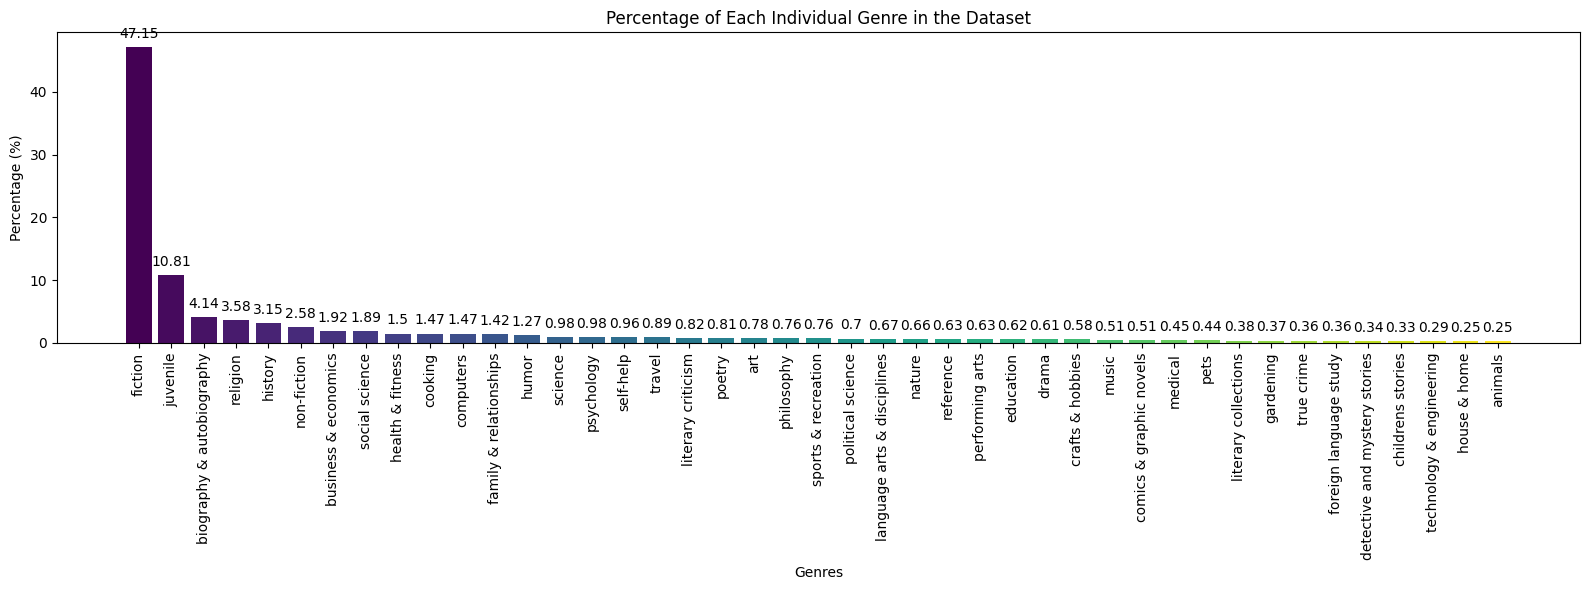

In [47]:
# Combine all genres into a single string and split them
all_genres = ','.join(merged_data_books['genres'].explode().dropna())
split_genres = [genre.strip() for genre in all_genres.split(',')]

# Get the frequency of each individual genre
genre_counts = pd.Series(split_genres).value_counts()

# Calculate the percentage of each genre
genre_percentages = (genre_counts / genre_counts.sum()) * 100

# Sort genres by count in descending order
sorted_genres = genre_percentages.sort_values(ascending=False)

# Customizing color
colors = plt.cm.get_cmap('viridis', len(sorted_genres))  

plt.figure(figsize=(16, 6))
bars = plt.bar(sorted_genres.index, sorted_genres, color=colors(range(len(sorted_genres))))
plt.title('Percentage of Each Individual Genre in the Dataset')
plt.xlabel('Genres')
plt.ylabel('Percentage (%)')
plt.xticks(rotation=90)

for bar in bars:
    yval = bar.get_height()
    plt.text(bar.get_x() + bar.get_width() / 2, yval + 1, round(yval, 2), ha='center', va='bottom')

plt.tight_layout()
plt.show()

## 4.3. CritiScore <a class="anchor" id="section_4_3"></a>

The CritiScore is a composite metric computed from two primary book rating indicators: 'rating' (Amazon book rating) and 'score' (another book rating metric). These ratings have been rescaled to align within a range of 0 to 100 for consistent comparison and analysis purposes.

#### Rating Metrics Overview:

| Metric                    | Scale | Description                                       |
|---------------------------|-------|---------------------------------------------------|
| Amazon Book Rating (rating) | 0-10  | Transformed to a normalized range of 0 to 100.    |
| Additional Book Rating Metric (score) | 0-5  | Rescaled to a range of 0 to 100 for standardization. |

#### Computation Methodology:

- **Single Rating Availability:**
  - If only one of the ratings ('rating' or 'score') is available, the CritiScore will be solely based on that available rating.

- **Both Ratings Available:**
  - When both ratings are present, the CritiScore is calculated as a weighted average.
  - Equal weight is assigned to each available rating, ensuring a balanced consideration of multiple ratings.
  - This aggregated CritiScore provides a unified evaluation derived from both 'rating' and 'score'.

#### Handling Missing Data:

- If neither 'rating' nor 'score' is available for a book, the corresponding CritiScore for that entry is marked as 'None'.

The CritiScore serves as an integrated evaluation metric, offering a consolidated perspective that combines insights from both 'rating' and 'score'.

In [48]:
merged_data_books.columns

Index(['title', 'isbn', 'rating', 'authors', 'year_of_publication',
       'publisher', 'description', 'Language', 'genres', 'country', 'score'],
      dtype='object')

Checking the distribution of ratings columns.

In [49]:
ratings = ['rating', 'score']
rating_stats = merged_data_books[ratings].describe()
rating_stats.loc[['min', 'max']]

,rating,score
min,0.0,0.0
max,10.0,5.0


Rescaling:

In [50]:
# Scaling IMDb rating to a range of 0-100
merged_data_books['rating_scaled'] = merged_data_books['rating'] * 10

# Scaling stars rating to a range of 0-100
merged_data_books['score_scaled'] = merged_data_books['score'] * 20

Calculating the actually CritiScore.

In [51]:
def calculate_criti_score(row):
    ratings = ['rating_scaled','score_scaled']
    available_ratings = [row[rating] for rating in ratings if row[rating] > 0]  # Check for non-zero ratings
    
    if len(available_ratings) == 0:
        return None  # No available ratings

    elif len(available_ratings) == 1:
        return available_ratings[0]  # Only one available rating, return it as CritiScore

    else:
        # Calculate weighted average for available ratings
        weights = [1 / len(available_ratings)] * len(available_ratings)
        criti_score = sum(available_ratings[i] * weights[i] for i in range(len(available_ratings)))
        return criti_score  # Return weighted average of available ratings

# Apply the function to calculate CritiScore for each row
merged_data_books['CritiScore'] = merged_data_books.apply(calculate_criti_score, axis=1)
    
# Remove rows with no available ratings
merged_data_books.dropna(subset=['CritiScore'], inplace=True)

# Round the 'CritiScore' to the nearest whole number and cast to integer
merged_data_books['CritiScore'] = merged_data_books['CritiScore'].round(0).astype(int)

For curiosity, let's create bins and check the distribution of CritiScore.

C:\Users\xandg\AppData\Local\Temp\ipykernel_28912\3793627591.py:7: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  colormap = get_cmap('viridis', num_bins)  # Generating colormap


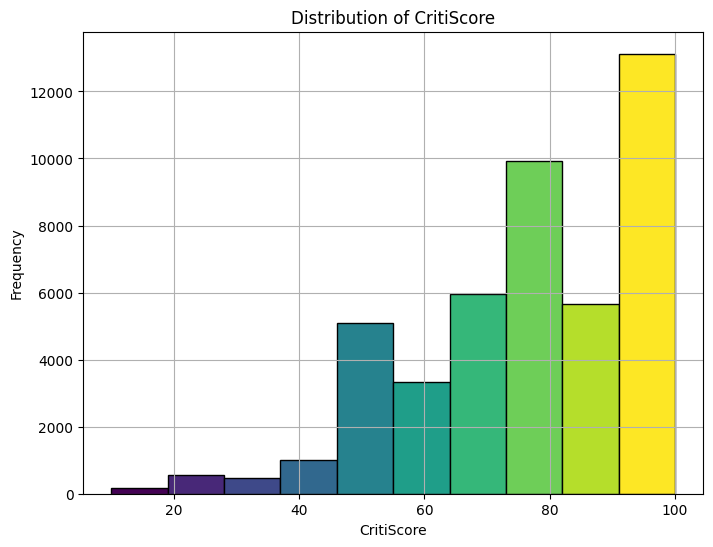

In [52]:
# Define the number of bins and create bins for the 'CritiScore' column
num_bins = 10  # Adjust the number of bins as needed
bins = pd.cut(merged_data_books['CritiScore'], num_bins)

# Plot the histogram of CritiScore distribution with 'viridis' colormap
plt.figure(figsize=(8, 6))
colormap = get_cmap('viridis', num_bins)  # Generating colormap
plt.hist(merged_data_books['CritiScore'], bins=num_bins, edgecolor='black')

# Set colors for each bar using the colormap
for i, patch in enumerate(plt.gca().patches):
    patch.set_facecolor(colormap(i))

plt.title('Distribution of CritiScore')
plt.xlabel('CritiScore')
plt.ylabel('Frequency')
plt.grid(True)
plt.show()

In terms of books, we have some well classificated books based on CritiScore.

## 4.4. Saving the Metadata with CritiScores <a class="anchor" id="section_4_4"></a>
Now we will delete unnecessary columns.

In [53]:
merged_data_books.columns

Index(['title', 'isbn', 'rating', 'authors', 'year_of_publication',
       'publisher', 'description', 'Language', 'genres', 'country', 'score',
       'rating_scaled', 'score_scaled', 'CritiScore'],
      dtype='object')

In [54]:
# List of columns to delete
columns_to_delete = ['rating','score', 'rating_scaled', 'score_scaled']

# Dropping the specified columns
merged_data_books.drop(columns=columns_to_delete, inplace=True)

Here is a final description of the Metadata.

| Column Name          | Description                                              |
|----------------------|----------------------------------------------------------|
| `title`              | The title of the book.                                   |
| `isbn`               | The International Standard Book Number.                   |
| `authors`            | The author(s) of the book.                                |
| `year_of_publication`| The year the book was published.                          |
| `publisher`          | The company or entity that published the book.            |
| `description`        | A brief summary or description of the book.               |
| `Language`           | The language in which the book is written.                |
| `genres`             | The genre or genres the book belongs to.                  |
| `country`            | The country associated with the book.                     |
| `CritiScore`         | A score or metric representing critical reception of the book. |


Now that we create the Data, we will save the dataset.

In [55]:
# Save as CSV
merged_data_books.to_csv(r'Data/Metadata/books.csv', index=False)